In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

url="https://raw.githubusercontent.com/isccastillo1977/-isccastillo1977-evidenciafinal-analisis-estadistico-al05089145/refs/heads/main/edi_transacciones_2025.csv"
df = pd.read_csv(url)



In [2]:
%matplotlib inline



<h3>Descripción del dataset</h3>
<h5>Este comando nos muestra la cantidad de columnas y renglones nulos en el archivo</h5>

    

In [3]:
df.count()


Estatus                         16244
Transacción                     16244
Fecha de Transmisión            16244
Proveedor                       16244
Tamaño del Archivo (KB)         16244
Número de Documentos            15432
Estándar                        16244
Versión del Cliente             14656
Tipo de Error                   14659
Tiempo de Procesamiento (ms)    15432
Canal de Transmisión            16244
Sistema Receptor                15432
Prioridad del Mensaje           16244
Causa de la Falla               16244
Detectado                       16244
Reportado por Cliente Final     16244
Sistema Transmisor              16244
multa                           16031
retrabajo (hrs)                 16031
dtype: int64

<h3>Revisión de dataset</h3>
<h5>Para ver una muestra de los datos, aplicamos este comando y podemos ver la naturaleza de los mismos, sus columnas y sus tipos. Ejecutamos el comando head.</h5>


In [4]:
df.head()

,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor,multa,retrabajo (hrs)
0,Éxito,856,2025-11-24,10749,442.74,65.0,EDIFACT,ECC6.0,Sin respuesta,1606.59,AS2,SAP,Media,Documento parcialmente transmitido,Sí,Sí,EPICOR,0.0,0.0
1,Falla,810,2025-02-27,5172,585.29,86.0,X12,S4HANA,Error de autenticación,2123.87,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER,258.0,4.3
2,Éxito,862,2025-01-13,10111,451.80,66.0,EDIFACT,R/3,Timeout,1639.47,API,WEBEDI,Baja,Mal encoding,No,Sí,LEGACY,0.0,0.0
3,Éxito,856,2025-05-21,8871,444.04,65.0,EDIFACT,NaN,Error de autenticación,1611.31,SFTP,VAN,Alta,Documento parcialmente transmitido,No,Sí,VAN,0.0,0.0
4,Éxito,830,2025-04-25,26702,376.54,55.0,EDIFACT,R/3,Timeout,1366.37,AS2,SAP,Alta,Formato no soportado,No,Sí,SEEBURGER,0.0,0.0


<h5>Si revisamos el archivo de manera general podemos localizar 18000 registros con 17 columnas con el comando shape.</h5>

In [5]:
df.shape

(16244, 19)

<h3>Revisión de características (columnas)</h3>
<h5>Este comando nos da la definición de las variables (características) de los datos en el archivo csv</h5>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estatus                       16244 non-null  object 
 1   Transacción                   16244 non-null  int64  
 2   Fecha de Transmisión          16244 non-null  object 
 3   Proveedor                     16244 non-null  int64  
 4   Tamaño del Archivo (KB)       16244 non-null  float64
 5   Número de Documentos          15432 non-null  float64
 6   Estándar                      16244 non-null  object 
 7   Versión del Cliente           14656 non-null  object 
 8   Tipo de Error                 14659 non-null  object 
 9   Tiempo de Procesamiento (ms)  15432 non-null  float64
 10  Canal de Transmisión          16244 non-null  object 
 11  Sistema Receptor              15432 non-null  object 
 12  Prioridad del Mensaje         16244 non-null  object 
 13  C

<h5>Podemos ver que algunas propiedades o atributos del dataset estan en nulo. Tamaño del archivo, numero de documentos, version del cliente, tipo de error.</h5>

In [7]:
df.isnull().sum()

Estatus                            0
Transacción                        0
Fecha de Transmisión               0
Proveedor                          0
Tamaño del Archivo (KB)            0
Número de Documentos             812
Estándar                           0
Versión del Cliente             1588
Tipo de Error                   1585
Tiempo de Procesamiento (ms)     812
Canal de Transmisión               0
Sistema Receptor                 812
Prioridad del Mensaje              0
Causa de la Falla                  0
Detectado                          0
Reportado por Cliente Final        0
Sistema Transmisor                 0
multa                            213
retrabajo (hrs)                  213
dtype: int64

<h5>Esto nos da un informe de las columnas, sus tipos de datos, sus valores faltantes, minimos y maximos</h5>

In [8]:

# Crear tabla resumen
summary = pd.DataFrame({
    "Nombre de Columna": df.columns,
    "Tipo de Dato": df.dtypes.values,
    "Valores Faltantes": df.isnull().sum().values,
    "Valor Mínimo": [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],
    "Valor Máximo": [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns]
})

# Mostrar la tabla
summary


,Nombre de Columna,Tipo de Dato,Valores Faltantes,Valor Mínimo,Valor Máximo
0,Estatus,object,0,NaN,NaN
1,Transacción,int64,0,810.00,862.00
2,Fecha de Transmisión,object,0,NaN,NaN
3,Proveedor,int64,0,1501.00,33568.00
4,Tamaño del Archivo (KB),float64,0,81.39,929.89
5,Número de Documentos,float64,812,12.00,136.00
6,Estándar,object,0,NaN,NaN
7,Versión del Cliente,object,1588,NaN,NaN
8,Tipo de Error,object,1585,NaN,NaN
9,Tiempo de Procesamiento (ms),float64,812,295.34,3374.33


<h3>ETL - Limpieza de Datos</h3>
Este código nos permite hacer una limpieza de los datos (nulos, duplicados, formato de fecha y numero)

In [9]:
# 1. Eliminar filas duplicadas
dflimpio = df.drop_duplicates()
# 2. Eliminar filas con valores nulos (opción básica)
dflimpio = dflimpio.dropna()


# 3. Validar tipos de datos (ejemplo: convertir a entero) - SEGUNDA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')

# 4. Eliminar registros donde Estatus sea 'Éxito' nos interesan unicamente las fallas , y hay muchos falsos positivos
dflimpio = dflimpio[dflimpio["Estatus"] != 'Éxito'].copy()
dflimpio = dflimpio.dropna()  # Eliminar filas con valores nulos

# Verificar y corregir formatos incorrectos en las columnas de fecha
dflimpio['Fecha de Transmisión'] = pd.to_datetime(dflimpio['Fecha de Transmisión'], errors='coerce')

# Transformación de variables si es necesario
# Por ejemplo, convertir la columna "Estatus" a variable categórica
dflimpio['Estatus'] = dflimpio['Estatus'].astype('category')



<h4>Después de eliminar duplicados y limpiar los datos</h4>

In [10]:
# 5. Verificar cambios
print("Registros después de limpieza:", len(df))
dflimpio.info()

Registros después de limpieza: 16244
<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 1 to 16242
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Estatus                       2843 non-null   category      
 1   Transacción                   2843 non-null   int64         
 2   Fecha de Transmisión          2843 non-null   datetime64[ns]
 3   Proveedor                     2843 non-null   int64         
 4   Tamaño del Archivo (KB)       2843 non-null   float64       
 5   Número de Documentos          2843 non-null   Int64         
 6   Estándar                      2843 non-null   object        
 7   Versión del Cliente           2843 non-null   object        
 8   Tipo de Error                 2843 non-null   object        
 9   Tiempo de Procesamiento (ms)  2843 non-null   float64       
 10  Canal de Transmisión          2843 non-null   object        
 1

<h3>ETL - Transformación de variables</h3>

<h5>Instalamos el scikit-learn para poder hacer algunas transformaciones de variables</h5>

In [11]:
!pip install scikit-learn
!pip install statsmodels


In [12]:
from sklearn.preprocessing import LabelEncoder

#Primero transformamos a enteros los numeros de documentos - TERCERA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')


dflimpio.head()


,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor,multa,retrabajo (hrs)
1,Falla,810,2025-02-27,5172,585.29,86,X12,S4HANA,Error de autenticación,2123.87,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER,258.0,4.30
5,Falla,810,2025-03-13,31017,578.17,85,EDIFACT,ECC6.0,Sin respuesta,2098.03,AS2,SAP,Media,Duplicado,No,Sí,SIMTEL,255.0,4.25
8,Falla,862,2025-02-14,4430,605.70,89,X12,410,Timeout,2197.93,API,Legacy,Baja,Formato no soportado,Sí,Sí,EPICOR,267.0,4.45
9,Falla,830,2025-10-30,12460,633.81,93,X12,ECC6.0,Error de autenticación,2299.93,SFTP,VAN,Baja,Formato no soportado,No,Sí,SIMTEL,279.0,4.65
12,Falla,830,2025-02-17,18278,702.60,103,X12,S4HANA,Timeout,2549.55,API,SAP,Alta,Fallo en unidades de medida,No,Sí,SEEBURGER,300.0,5.15


<H3>Análisis Exploratorio de datos </H3>

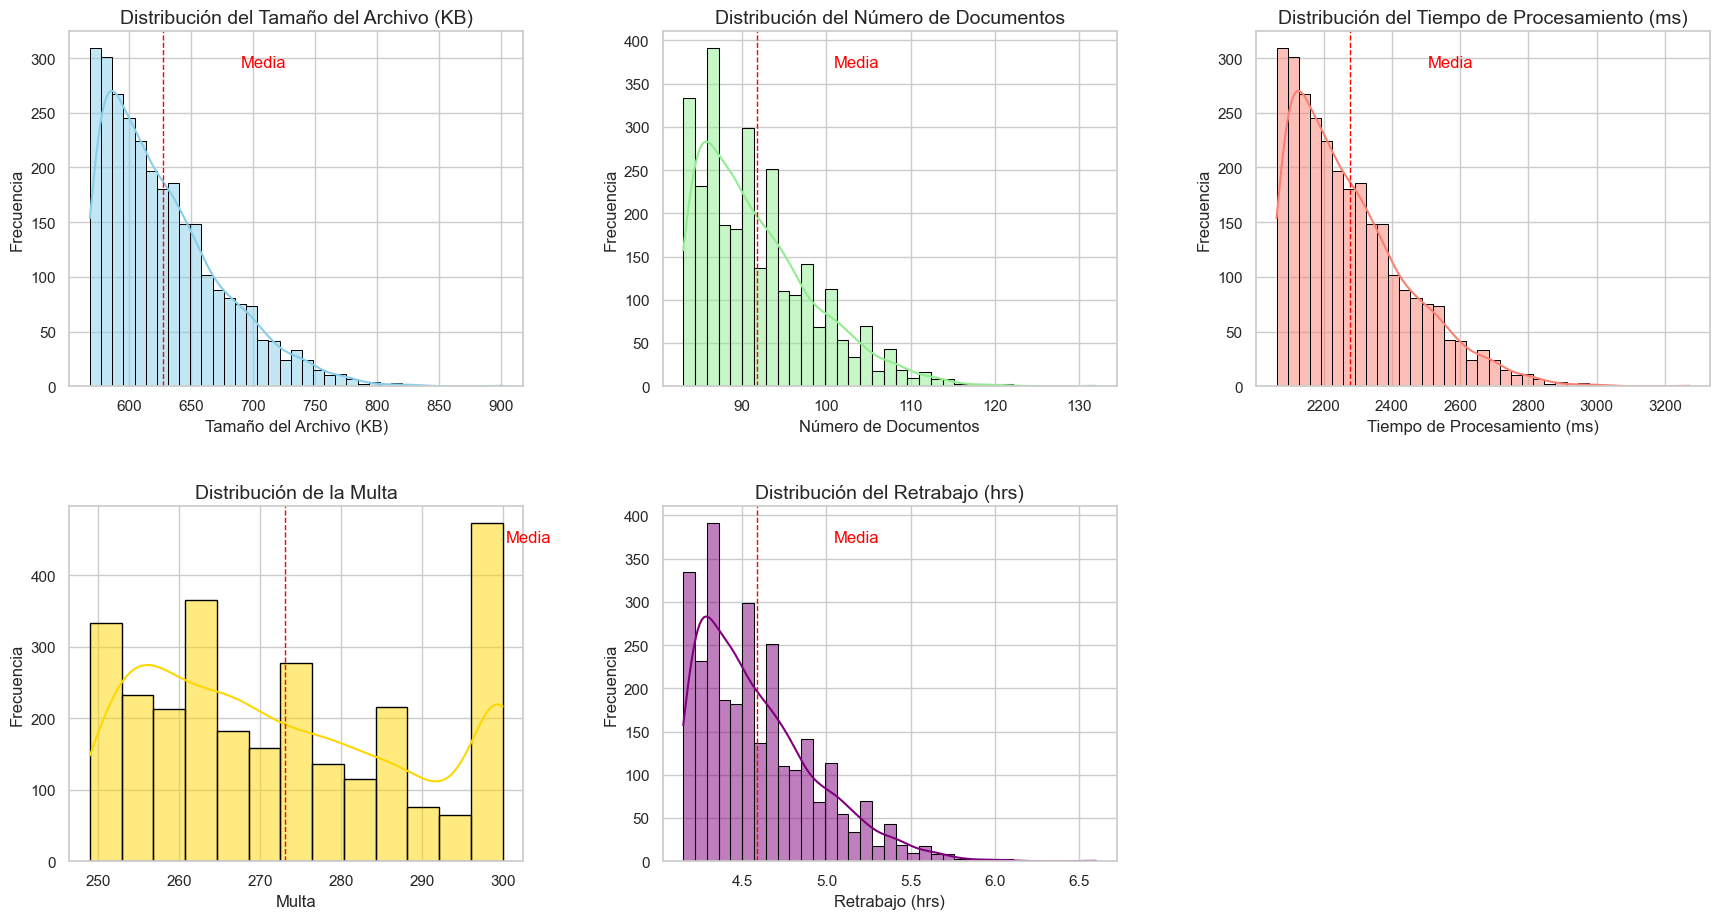

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de visualización
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Histograma para 'Tamaño del Archivo (KB)'
plt.subplot(2, 3, 1)
sns.histplot(dflimpio['Tamaño del Archivo (KB)'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución del Tamaño del Archivo (KB)', fontsize=14)
plt.xlabel('Tamaño del Archivo (KB)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dflimpio['Tamaño del Archivo (KB)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(dflimpio['Tamaño del Archivo (KB)'].mean()*1.1, max(plt.gca().get_ylim())*0.9, 'Media', color='red')

# Histograma para 'Número de Documentos'
plt.subplot(2, 3, 2)
sns.histplot(dflimpio['Número de Documentos'], kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribución del Número de Documentos', fontsize=14)
plt.xlabel('Número de Documentos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dflimpio['Número de Documentos'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(dflimpio['Número de Documentos'].mean()*1.1, max(plt.gca().get_ylim())*0.9, 'Media', color='red')

# Histograma para 'Tiempo de Procesamiento (ms)'
plt.subplot(2, 3, 3)
sns.histplot(dflimpio['Tiempo de Procesamiento (ms)'], kde=True, color='salmon', edgecolor='black')
plt.title('Distribución del Tiempo de Procesamiento (ms)', fontsize=14)
plt.xlabel('Tiempo de Procesamiento (ms)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dflimpio['Tiempo de Procesamiento (ms)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(dflimpio['Tiempo de Procesamiento (ms)'].mean()*1.1, max(plt.gca().get_ylim())*0.9, 'Media', color='red')

# Histograma para 'multa'
plt.subplot(2, 3, 4)
sns.histplot(dflimpio['multa'], kde=True, color='gold', edgecolor='black')
plt.title('Distribución de la Multa', fontsize=14)
plt.xlabel('Multa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dflimpio['multa'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(dflimpio['multa'].mean()*1.1, max(plt.gca().get_ylim())*0.9, 'Media', color='red')

# Histograma para 'retrabajo (hrs)'
plt.subplot(2, 3, 5)
sns.histplot(dflimpio['retrabajo (hrs)'], kde=True, color='purple', edgecolor='black')
plt.title('Distribución del Retrabajo (hrs)', fontsize=14)
plt.xlabel('Retrabajo (hrs)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dflimpio['retrabajo (hrs)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(dflimpio['retrabajo (hrs)'].mean()*1.1, max(plt.gca().get_ylim())*0.9, 'Media', color='red')

# Ajustar el diseño de la figura
plt.tight_layout(pad=3.0)
plt.show()



<H4>Podemos observar que ningún métrico sigue la distribución normal</H4>

<h3>Análisis Q-Q Plot</h3>

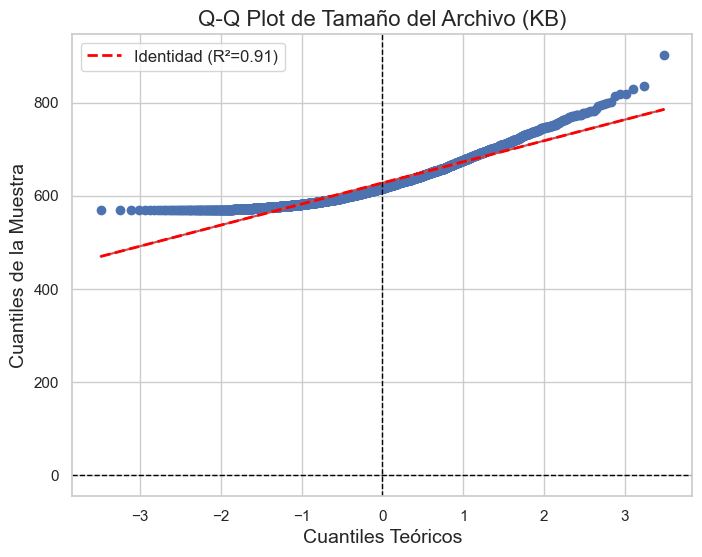

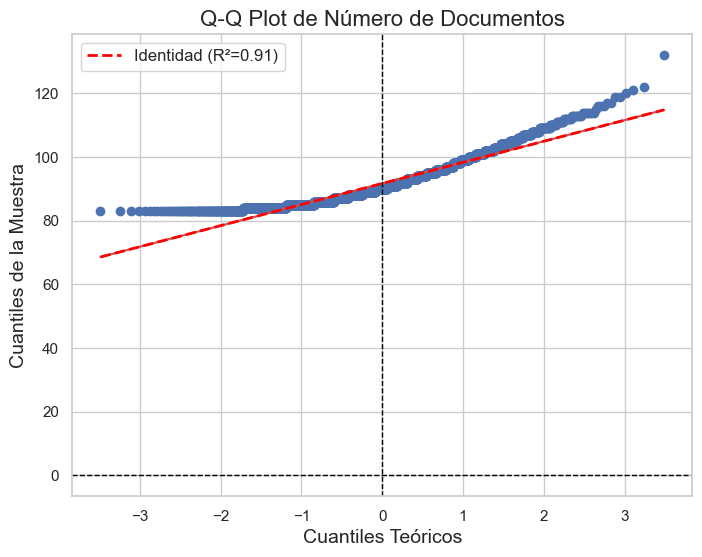

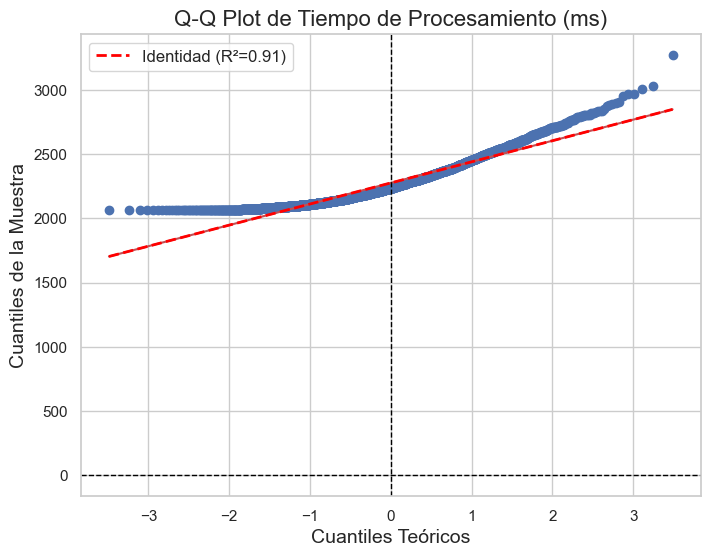

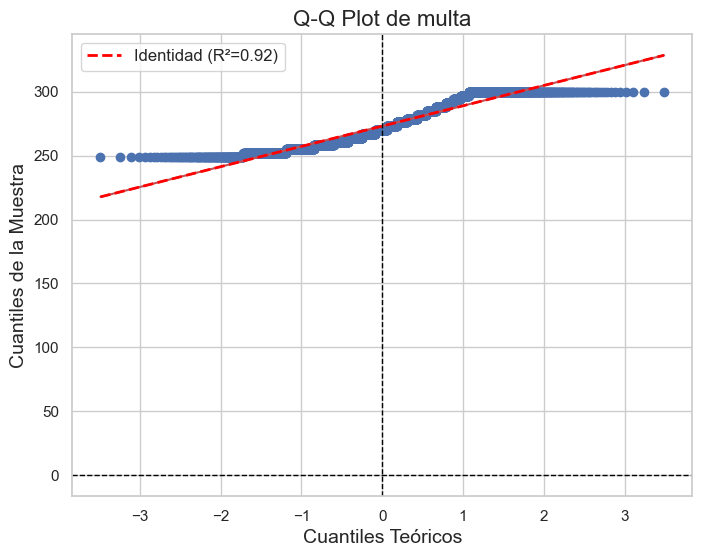

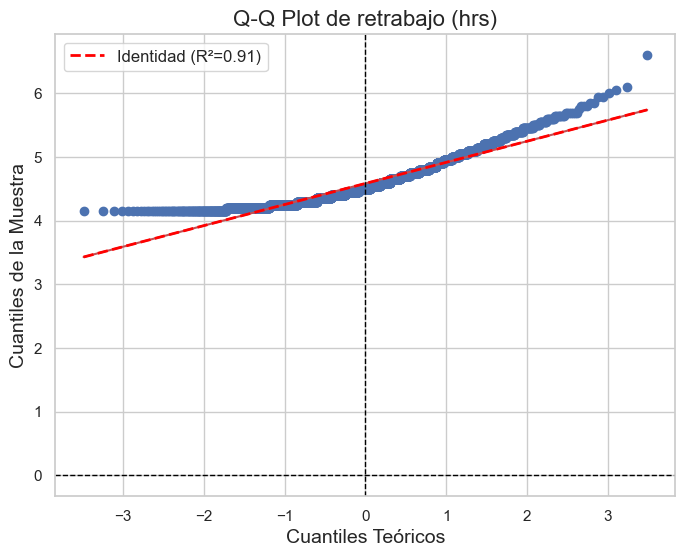

In [14]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo de visualización
sns.set(style="whitegrid")

# Generar Q-Q plots para las variables numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    res = stats.probplot(dflimpio[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}', fontsize=16)
    plt.xlabel('Cuantiles Teóricos', fontsize=14)
    plt.ylabel('Cuantiles de la Muestra', fontsize=14)
    plt.grid(True)

    # Añadir líneas de referencia
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    # Mejorar la línea de identidad
    slope, intercept, r = res[1]
    x = np.array(plt.gca().get_lines()[1].get_xdata())
    y = slope * x + intercept
    plt.plot(x, y, color='red', linestyle='--', linewidth=2, label=f'Identidad (R²={r**2:.2f})')
    
    # Añadir leyenda
    plt.legend(loc='best', fontsize=12)
    
    plt.show()


<h4>Observando las gráficas podemos constatar que ninguna variable sigue la distribución estandar</h4>

In [15]:
import pandas as pd
from scipy.stats import normaltest


# Seleccionar columnas numéricas
num_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Lista para almacenar resultados
resultados = []

# Aplicar prueba de normalidad de D'Agostino y Pearson
for col in num_cols:
    datos = dflimpio[col].dropna()
    stat, p = normaltest(datos)
    distribucion = "Normal" if p > 0.05 else "No Normal"
    
    resultados.append({
        'Variable': col,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        'Distribución': distribucion
    })

# Convertir a DataFrame
resumen_normalidad = pd.DataFrame(resultados)

# Mostrar resultados
print("Resumen de pruebas de normalidad (D'Agostino y Pearson):")
display(resumen_normalidad)




Resumen de pruebas de normalidad (D'Agostino y Pearson):


,Variable,Estadístico,p-valor,Distribución
0,Tamaño del Archivo (KB),441.4256,0.0,No Normal
1,Número de Documentos,438.0703,0.0,No Normal
2,Tiempo de Procesamiento (ms),441.4262,0.0,No Normal
3,multa,2102.8690,0.0,No Normal
4,retrabajo (hrs),438.0703,0.0,No Normal


<h4>La prueba de DAgostino u Pearson tambien muestra que no son Distribuciones Normales</h4>

<h3>Normalización y estandarización de conjunto de datos</h3>

In [16]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Seleccionar las columnas numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Inicializar los escaladores
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Aplicar Min-Max Scaling (Normalización)
data_minmax_scaled = dflimpio.copy()
data_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(dflimpio[numeric_cols])

# Aplicar Standard Scaling (Estandarización)
data_standard_scaled = dflimpio.copy()
data_standard_scaled[numeric_cols] = scaler_standard.fit_transform(dflimpio[numeric_cols])

# Verificar los resultados de la normalización
print("Datos Normalizados (Min-Max Scaling):")
print(data_minmax_scaled[numeric_cols].head())

# Verificar los resultados de la estandarización
print("\nDatos Estandarizados (Standard Scaling):")
print(data_standard_scaled[numeric_cols].head())








Datos Normalizados (Min-Max Scaling):
    Tamaño del Archivo (KB)  Número de Documentos  \
1                  0.050810              0.061224   
5                  0.029442              0.040816   
8                  0.112065              0.122449   
9                  0.196429              0.204082   
12                 0.402881              0.408163   

    Tiempo de Procesamiento (ms)     multa  retrabajo (hrs)  
1                       0.050815  0.176471         0.061224  
5                       0.029443  0.117647         0.040816  
8                       0.112067  0.352941         0.122449  
9                       0.196427  0.588235         0.204082  
12                      0.402878  1.000000         0.408163  

Datos Estandarizados (Standard Scaling):
    Tamaño del Archivo (KB)  Número de Documentos  \
1                 -0.891395             -0.824020   
5                 -1.041870             -0.968354   
8                 -0.460048             -0.391017   
9                

<h4>
    Tras aplicar la estandarización, las variables numéricas clave fueron transformadas para tener media 0 y desviación estándar 1, lo que permite compararlas en una misma escala. Estas variables son:
1. Tamaño del Archivo (KB)
2. Número de Documentos
3. Tiempo de Procesamiento (ms)
4. multa
5. retrabajo (hrs)    
</h4>



C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dflimpio[col], palette="Set2", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dflimpio[col], palette="Set2", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dflimpio[col], palette="Set2", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198

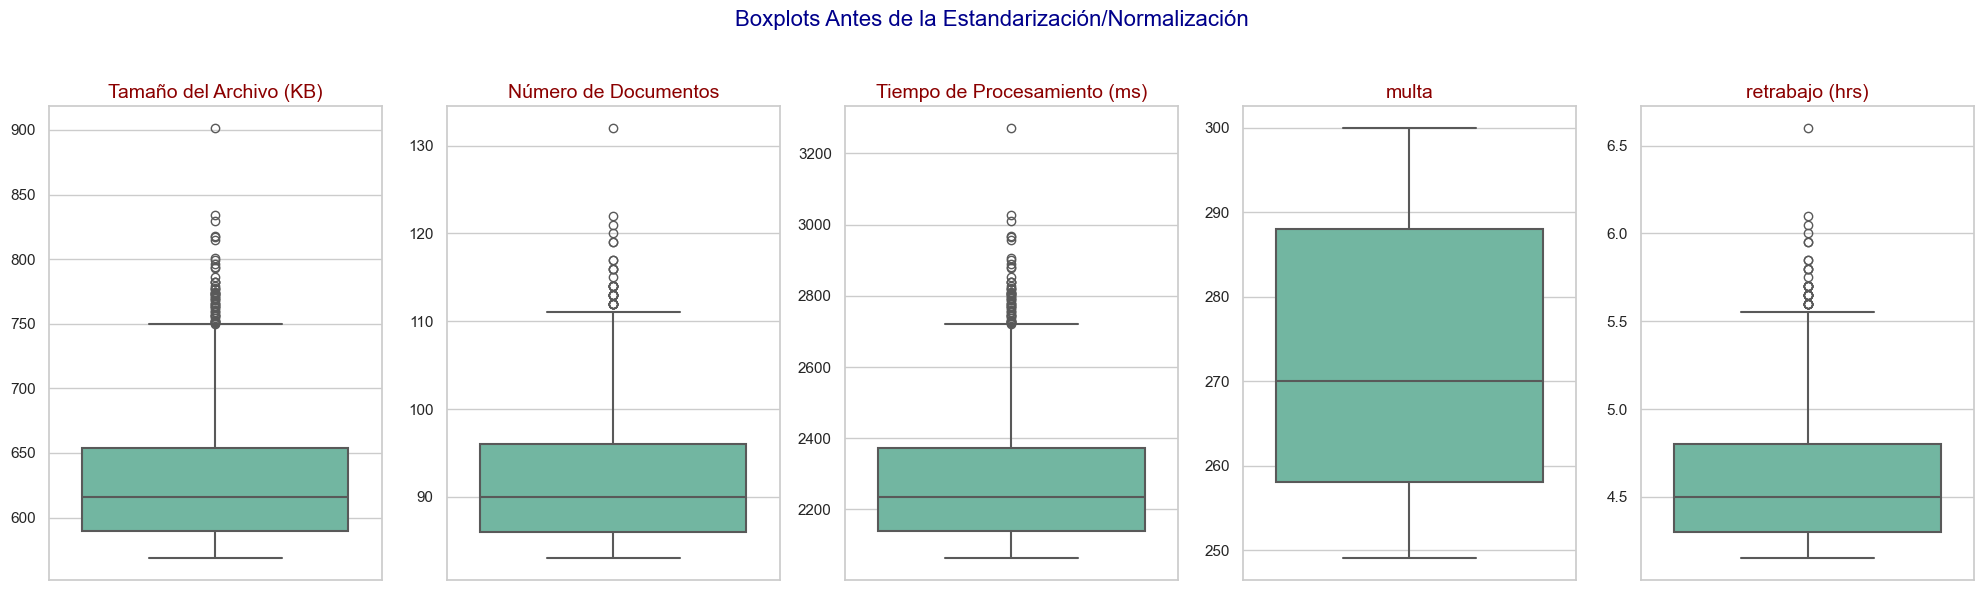

C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_standard_scaled[col], palette="Set3", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_standard_scaled[col], palette="Set3", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_standard_scaled[col], palette="Set3", linewidth=1.5)
C:\Users\jc70794\AppDa

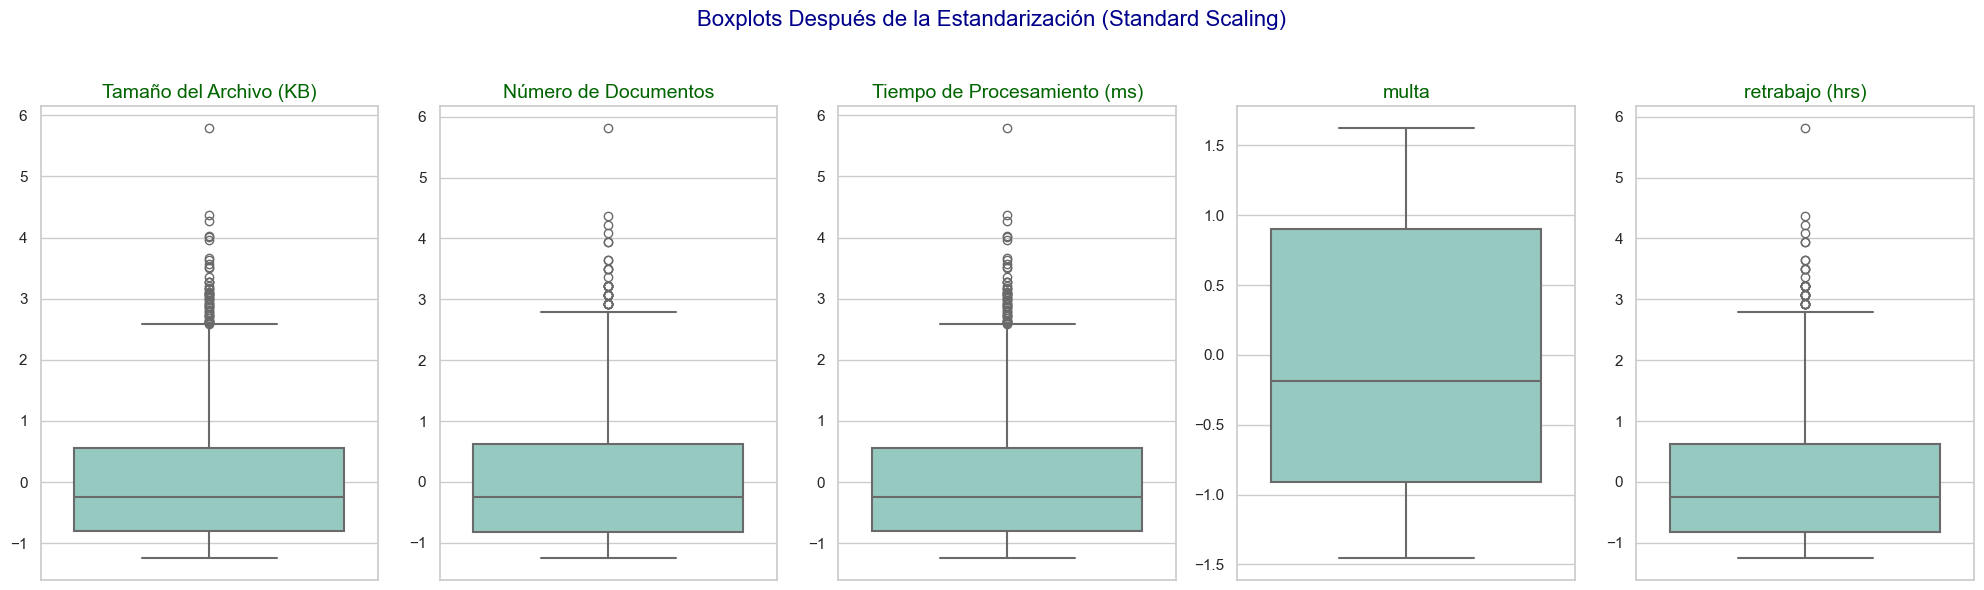

C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_minmax_scaled[col], palette="Set1", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_minmax_scaled[col], palette="Set1", linewidth=1.5)
C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\1549198792.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_minmax_scaled[col], palette="Set1", linewidth=1.5)
C:\Users\jc70794\AppData\Loc

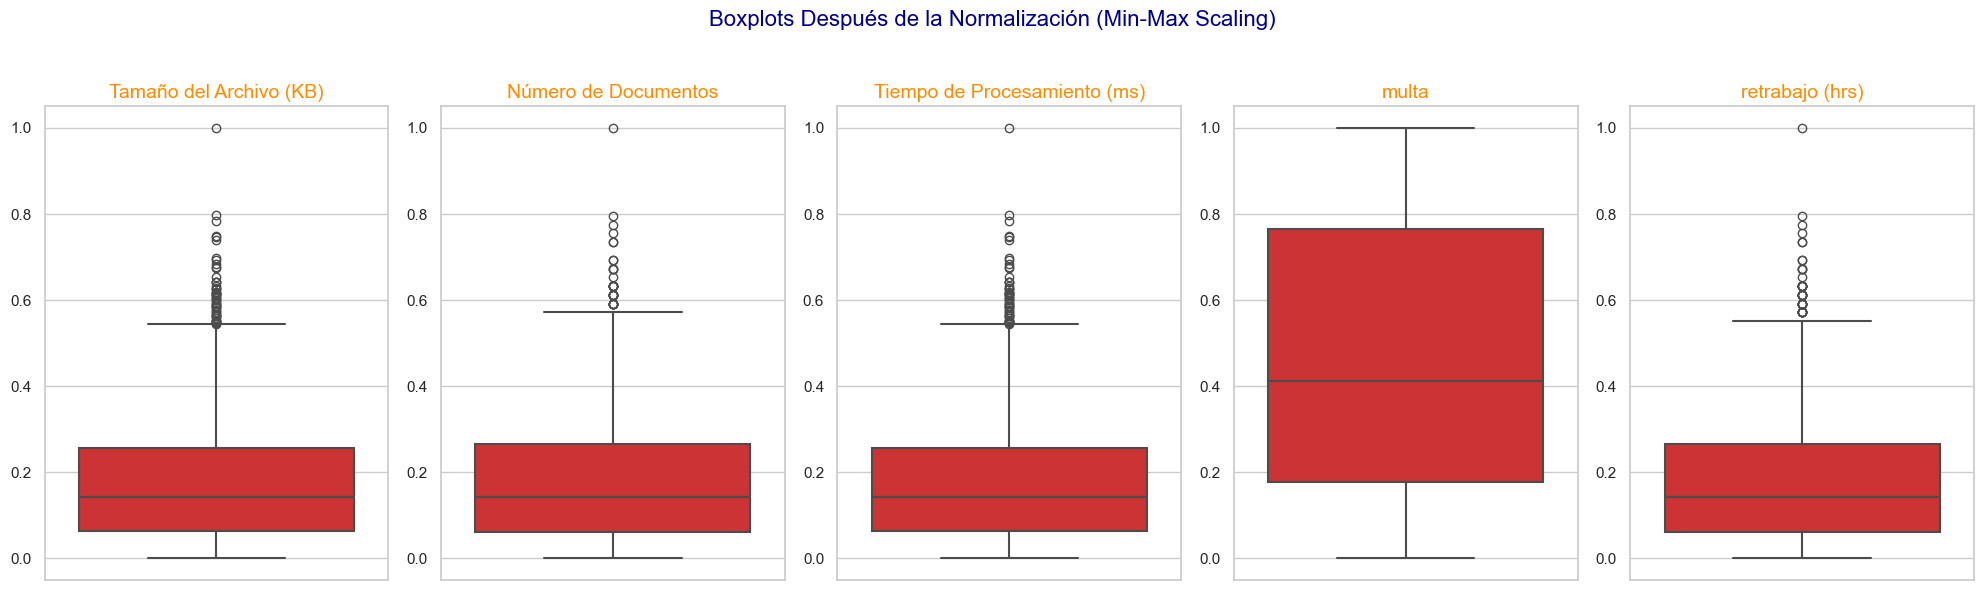

In [17]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Configuración de estilo de visualización
sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12})

# Seleccionar las columnas numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Crear boxplots para las variables numéricas antes de la estandarización
plt.figure(figsize=(20, 6))
plt.suptitle('Boxplots Antes de la Estandarización/Normalización', fontsize=16, color='darkblue')

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=dflimpio[col], palette="Set2", linewidth=1.5)
    plt.title(f'{col}', color='darkred')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Crear boxplots para las variables numéricas después de la estandarización
plt.figure(figsize=(20, 6))
plt.suptitle('Boxplots Después de la Estandarización (Standard Scaling)', fontsize=16, color='darkblue')

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data_standard_scaled[col], palette="Set3", linewidth=1.5)
    plt.title(f'{col}', color='darkgreen')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Crear boxplots para las variables numéricas después de la normalización
plt.figure(figsize=(20, 6))
plt.suptitle('Boxplots Después de la Normalización (Min-Max Scaling)', fontsize=16, color='darkblue')

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data_minmax_scaled[col], palette="Set1", linewidth=1.5)
    plt.title(f'{col}', color='darkorange')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


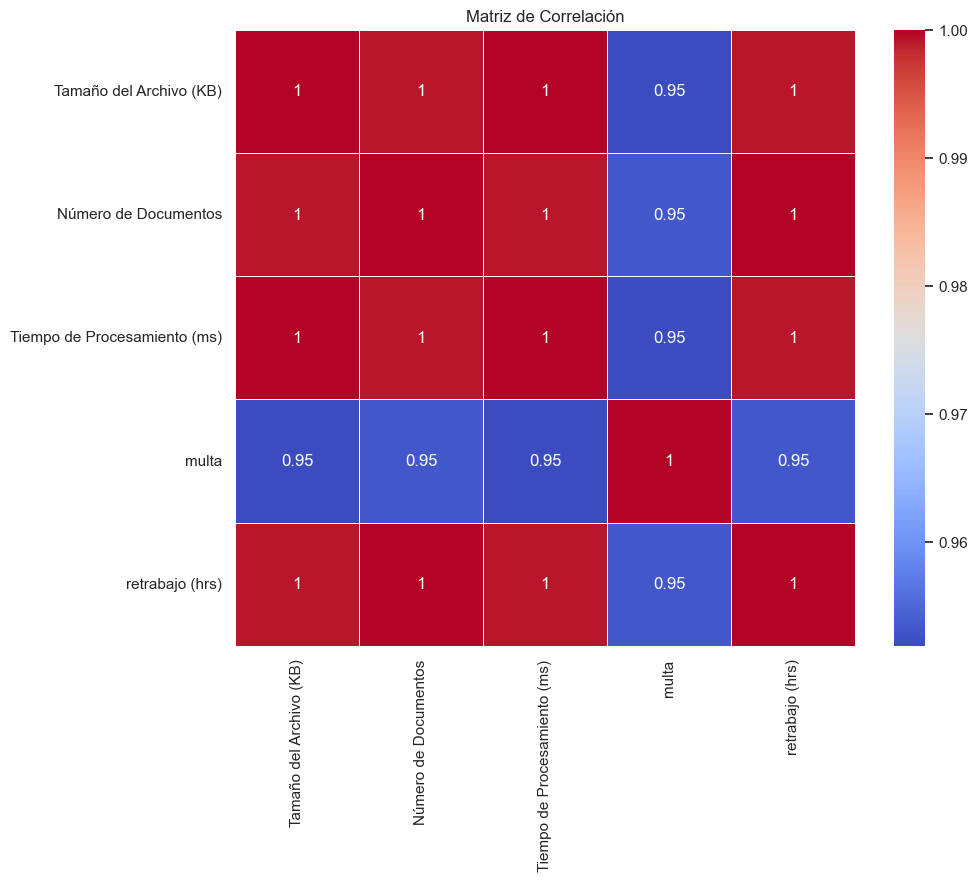

In [18]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Configuración de estilo de visualización
sns.set(style="whitegrid")


# Seleccionar las columnas numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Calcular la matriz de correlación
corr_matrix = dflimpio[numeric_cols].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()







<h3>La matriz de calor revela una alta correlación entre las variables seleccionadas, lo que indica que los datos están fuertemente interrelacionados. Específicamente, se observa que el tamaño del archivo en kilobytes (KB) aumenta proporcionalmente con el número de documentos. Esta relación sugiere que a medida que se procesan más documentos, el tamaño de los archivos también se incrementa, lo cual es lógico y esperado en el contexto de la gestión de documentos electrónicos.

Además, se puede notar que el tiempo de procesamiento se incrementa con el tamaño del archivo. Esto implica que archivos más grandes requieren más tiempo para ser procesados, lo cual puede deberse a la mayor cantidad de datos que deben ser manejados y validados. Este hallazgo es crucial para optimizar los tiempos de procesamiento y podría indicar la necesidad de mejorar la infraestructura tecnológica o los algoritmos de procesamiento para manejar archivos grandes de manera más eficiente.

Desde una perspectiva empresarial, las multas están positivamente correlacionadas con el número de documentos. Este hallazgo sugiere que a medida que aumenta el número de documentos procesados, también aumenta la probabilidad de incurrir en multas. Esto podría ser debido a errores que se cometen con mayor frecuencia cuando se manejan volúmenes altos de documentos. Identificar y mitigar estos errores podría ser una estrategia efectiva para reducir las multas y mejorar la eficiencia operativa.

Finalmente, el análisis muestra que el tiempo de retrabajo es mayor cuando hay más documentos que corregir y reenviar. Esto indica que la carga de retrabajo está directamente relacionada con el volumen de documentos que presentan errores o que necesitan ajustes. Este hallazgo resalta la importancia de implementar controles de calidad más estrictos en las etapas iniciales del proceso de documentación para minimizar el retrabajo y, por ende, reducir los costos y el tiempo asociados.

En resumen, la matriz de calor no solo destaca las interrelaciones entre las variables, sino que también proporciona información valiosa que puede ser utilizada para mejorar los procesos internos y la toma de decisiones estratégicas. Optimizar el manejo y procesamiento de documentos, reducir errores que llevan a multas, y disminuir el tiempo de retrabajo son áreas clave que pueden beneficiarse de estos hallazgos</h3>


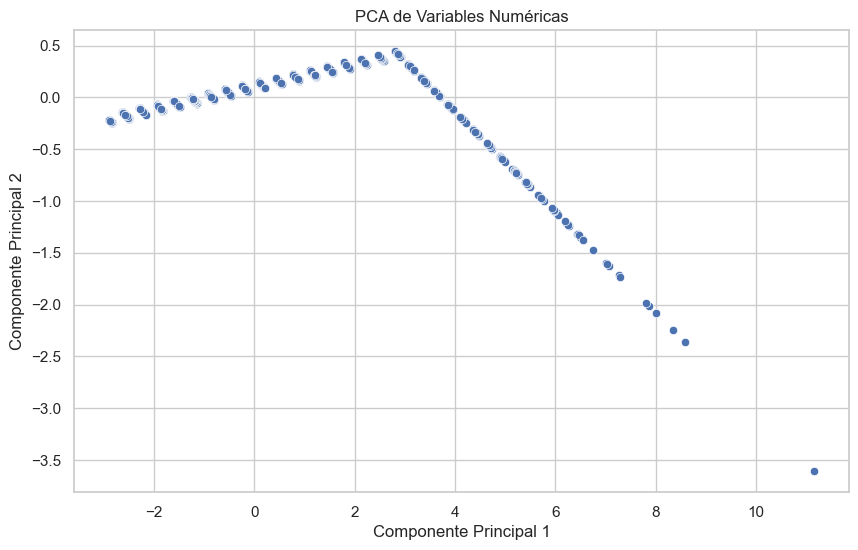

Varianza explicada por el primer componente: 0.98
Varianza explicada por el segundo componente: 0.02
Mean Squared Error (MSE): 8.617445100445893e-06
R-squared (R²): 0.9999999997241923
                         Coeficiente
Número de Documentos       -0.000123
Tamaño del Archivo (KB)     3.628760


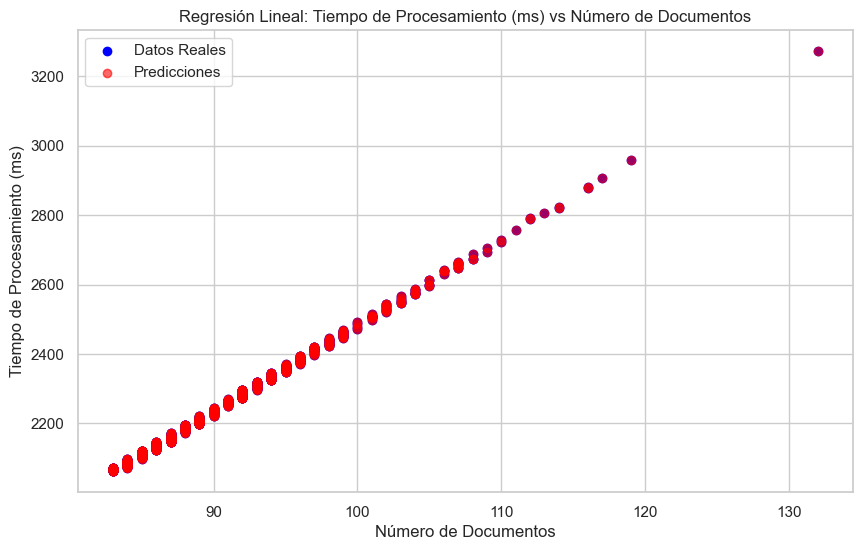

In [19]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de estilo de visualización
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dflimpio[numeric_cols])

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes para visualización
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA de Variables Numéricas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Explicar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")



# Seleccionar las columnas para el modelo
X = dflimpio[['Número de Documentos', 'Tamaño del Archivo (KB)']]
y = dflimpio['Tiempo de Procesamiento (ms)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Número de Documentos'], y_test, color='blue', label='Datos Reales')
plt.scatter(X_test['Número de Documentos'], y_pred, color='red', label='Predicciones', alpha=0.6)
plt.xlabel('Número de Documentos')
plt.ylabel('Tiempo de Procesamiento (ms)')
plt.title('Regresión Lineal: Tiempo de Procesamiento (ms) vs Número de Documentos')
plt.legend()
plt.show()



<h3>Las gráficas de regresión lineal presentadas confirman las observaciones previas y proporcionan evidencia adicional sobre las relaciones entre las variables. En primer lugar, se puede inferir que el número de documentos tiene una influencia significativa en el total de las multas. A medida que aumenta el número de documentos, también lo hace la probabilidad de incurrir en multas, probablemente debido a un incremento en los errores cometidos en el manejo de grandes volúmenes de documentos.
Asimismo, las gráficas indican que el tamaño del archivo en kilobytes está directamente relacionado con el tiempo de procesamiento. Archivos más grandes requieren más tiempo para ser procesados, lo que sugiere que optimizar el manejo de archivos grandes podría mejorar la eficiencia operativa. Esta relación es crítica para la planificación de recursos y la mejora de la infraestructura tecnológica.

Finalmente, es evidente que existe una relación positiva entre el número de documentos y el tamaño del archivo. A medida que se procesan más documentos, el tamaño del archivo también aumenta. Esta relación es intuitiva y subraya la necesidad de gestionar eficientemente el almacenamiento y la capacidad de procesamiento, especialmente en entornos con grandes volúmenes de datos.

En resumen, las gráficas de regresión lineal no solo corroboran las observaciones anteriores, sino que también proporcionan una base cuantitativa sólida para entender cómo las variables interrelacionadas afectan el rendimiento y la eficiencia operativa.</h3>

Mean Squared Error (MSE): 3.8714561431639534
R-squared (R²): 0.9983683981411344


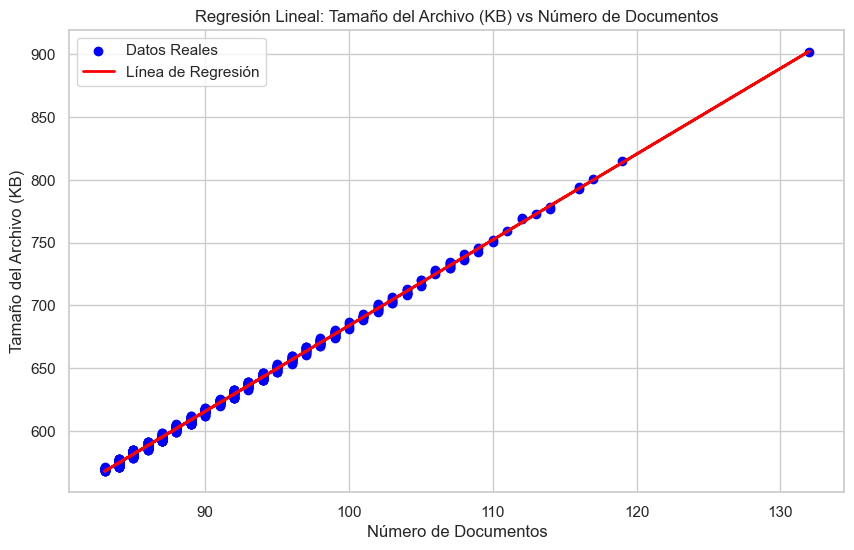

Mean Squared Error (MSE): 6.536468676954339e-07
R-squared (R²): 0.9999999997245245


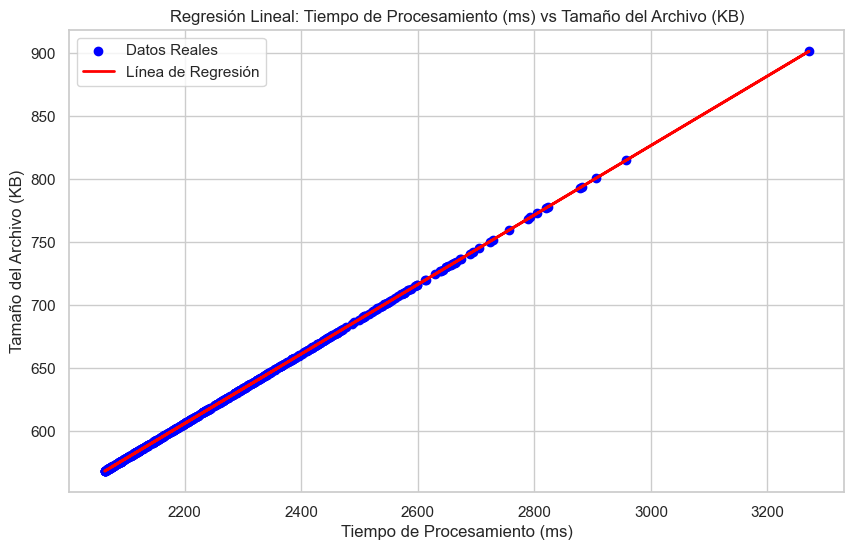

Mean Squared Error (MSE): 6.088696687799961
R-squared (R²): 0.8802754443301206


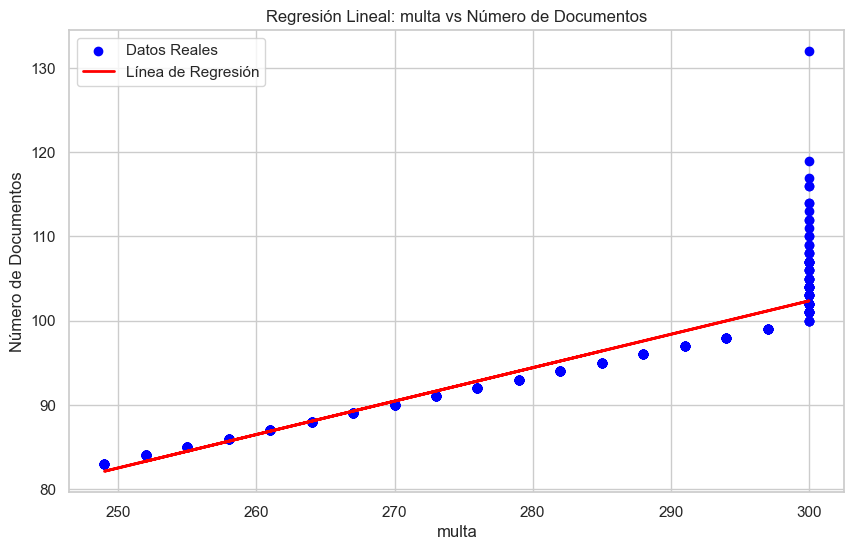

Mean Squared Error (MSE): 0.08296595570674396
R-squared (R²): 0.9983686061743525


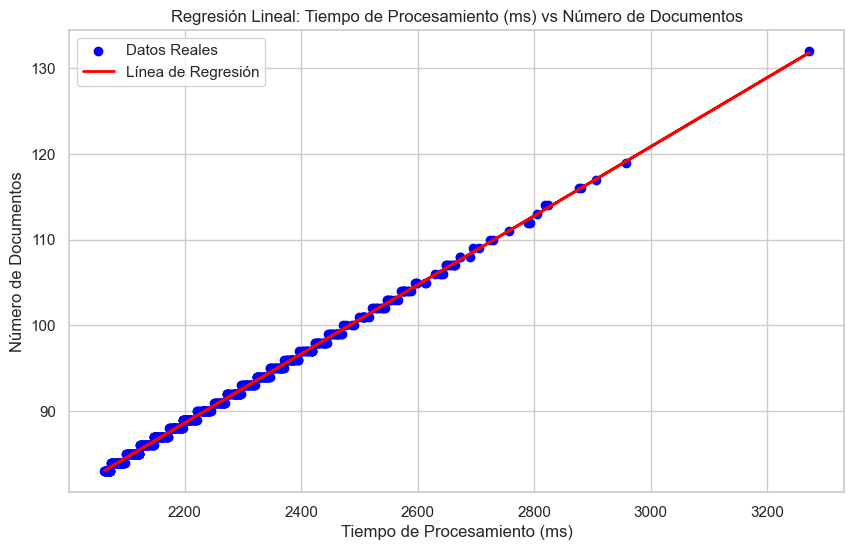

In [20]:
# Importar librerías necesarias para modelado predictivo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las columnas para el modelo
X = dflimpio[['Número de Documentos']]
y = dflimpio['Tamaño del Archivo (KB)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Número de Documentos')
plt.ylabel('Tamaño del Archivo (KB)')
plt.title('Regresión Lineal: Tamaño del Archivo (KB) vs Número de Documentos')
plt.legend()
plt.show()


# Seleccionar las columnas para el modelo
X = dflimpio[['Tiempo de Procesamiento (ms)']]
y = dflimpio['Tamaño del Archivo (KB)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Tiempo de Procesamiento (ms)')
plt.ylabel('Tamaño del Archivo (KB)')
plt.title('Regresión Lineal: Tiempo de Procesamiento (ms) vs Tamaño del Archivo (KB)')
plt.legend()
plt.show()


# Seleccionar las columnas para el modelo
X = dflimpio[['multa']]
y = dflimpio['Número de Documentos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('multa')
plt.ylabel('Número de Documentos')
plt.title('Regresión Lineal: multa vs Número de Documentos')
plt.legend()
plt.show()



# Seleccionar las columnas para el modelo
X = dflimpio[['Tiempo de Procesamiento (ms)']]
y = dflimpio['Número de Documentos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Tiempo de Procesamiento (ms)')
plt.ylabel('Número de Documentos')
plt.title('Regresión Lineal: Tiempo de Procesamiento (ms) vs Número de Documentos')
plt.legend()
plt.show()








<h3>El análisis de componentes principales (PCA) y el modelo de regresión lineal nos ayudan a entender mejor nuestras variables y a predecir el tiempo de procesamiento.

En el PCA, vemos que el primer componente principal captura el 98% de la variabilidad de los datos. Esto significa que casi toda la información importante está en este primer componente. El segundo componente principal captura solo el 2% restante. Juntos, estos dos componentes explican todo lo que necesitamos saber sobre la variabilidad de los datos.

En la regresión lineal, el Mean Squared Error (MSE) es extremadamente bajo, lo que indica que nuestras predicciones están muy cerca de los valores reales. El R-squared (R²) es casi perfecto, lo que significa que nuestro modelo explica casi el 100% de la variabilidad en el tiempo de procesamiento. Esto demuestra que nuestro modelo es muy preciso.

Los coeficientes del modelo nos dicen que, sorprendentemente, un aumento en el número de documentos tiene un impacto muy pequeño y negativo en el tiempo de procesamiento. Esto podría ser una excepción o indicar una relación muy débil. Por otro lado, el tamaño del archivo tiene un impacto significativo y positivo en el tiempo de procesamiento. Cada aumento de 1 KB en el tamaño del archivo incrementa el tiempo de procesamiento en aproximadamente 3.63 milisegundos.

En resumen, el PCA nos muestra que la mayor parte de la variabilidad está en el primer componente, mientras que la regresión lineal indica que el tamaño del archivo es el principal factor que determina el tiempo de procesamiento.</h3>

Mean Squared Error (MSE): 7470.008371455754
R-squared (R²): 0.9445272919899862


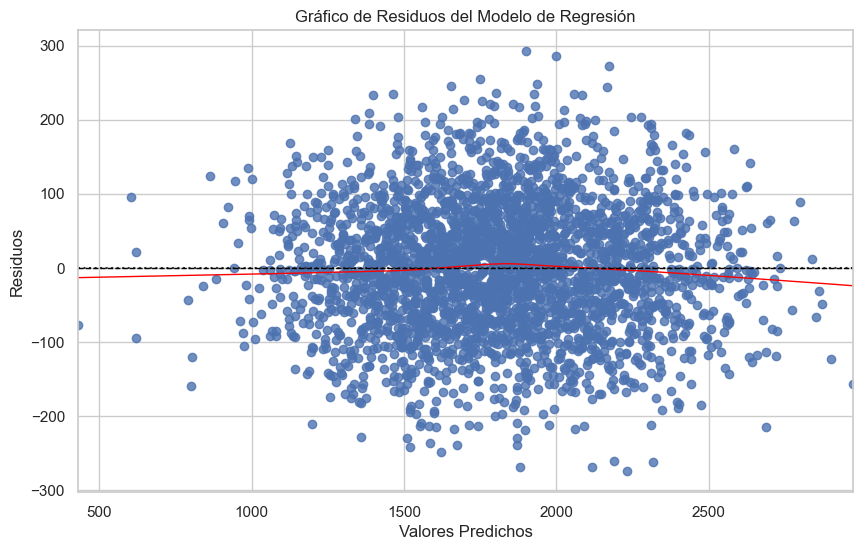

In [21]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de estilo de visualización
sns.set(style="whitegrid")

# Paso 1: Cargar el archivo CSV
url="https://raw.githubusercontent.com/isccastillo1977/-isccastillo1977-evidenciafinal-analisis-estadistico-al05089145/refs/heads/main/edi_transacciones_segundaMuestra_evidenciaFinal.csv"
df = pd.read_csv(url)

# Paso 2: Eliminar duplicados
df = df.drop_duplicates()

# Paso 3: Selección de variables numéricas relevantes
variables = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']
dflimpio = df[variables].copy()

# Paso 4: Conversión a tipo numérico y limpieza de valores no válidos
for col in variables:
    dflimpio[col] = pd.to_numeric(dflimpio[col], errors='coerce')
dflimpio = dflimpio.dropna()

# Seleccionar las columnas para el modelo
X = dflimpio[['Número de Documentos', 'Tamaño del Archivo (KB)','multa']]
y = dflimpio['Tiempo de Procesamiento (ms)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos del Modelo de Regresión')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


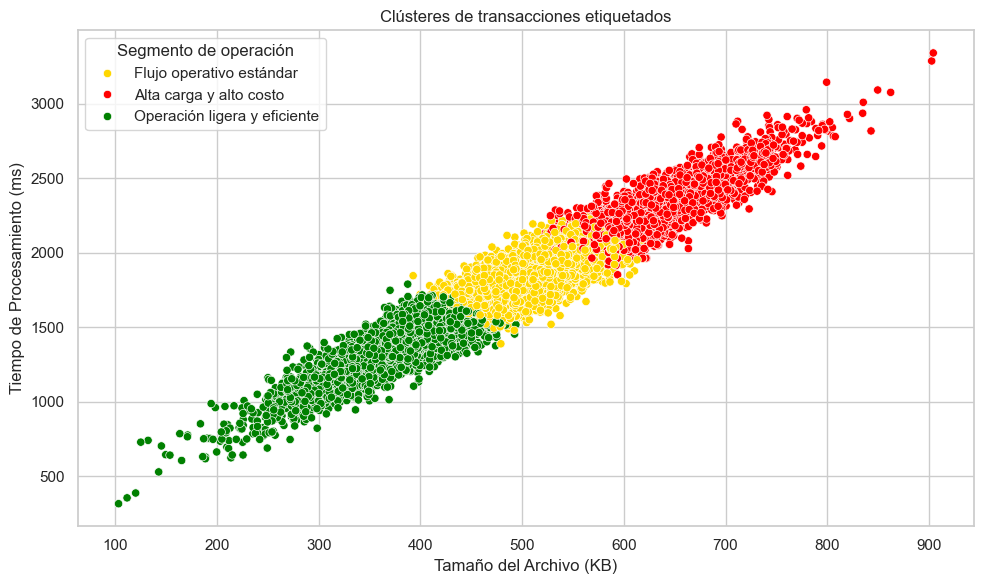

Perfil promedio por clúster:


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar el archivo CSV
df = pd.read_csv("edi_transacciones_segundaMuestra_evidenciaFinal.csv")

# Paso 2: Eliminar duplicados
df = df.drop_duplicates()

# Paso 3: Selección de variables numéricas relevantes
variables = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']
dflimpio = df[variables].copy()

# Paso 4: Conversión a tipo numérico y limpieza de valores no válidos
for col in variables:
    dflimpio[col] = pd.to_numeric(dflimpio[col], errors='coerce')
dflimpio = dflimpio.dropna()

# Paso 5: Estandarización y escalado
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dflimpio)

# Paso 6: Aplicación de K-means
kmeans = KMeans(n_clusters=3, random_state=42)
dflimpio['cluster'] = kmeans.fit_predict(scaled_data)

# Paso 7: Crear títulos ejecutivos para cada clúster con descripción
perfil_cluster = dflimpio.groupby('cluster').mean().round(2)
cluster_titles = {}
for cluster_id, row in perfil_cluster.iterrows():
    if row['multa'] > 200 and row['retrabajo (hrs)'] > 4:
        title = "Alta carga y alto costo"
    elif row['Tiempo de Procesamiento (ms)'] < 1500 and row['Número de Documentos'] < 60:
        title = "Operación ligera y eficiente"
    else:
        title = "Flujo operativo estándar"
    cluster_titles[cluster_id] = title

# Paso 8: Visualización de los clústeres con etiquetas ejecutivas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dflimpio,
    x='Tamaño del Archivo (KB)',
    y='Tiempo de Procesamiento (ms)',
    hue=dflimpio['cluster'].map(cluster_titles),
    palette={
        'Alta carga y alto costo': 'red',
        'Flujo operativo estándar': 'gold',
        'Operación ligera y eficiente': 'green'
    }
)
plt.title('Clústeres de transacciones etiquetados')
plt.xlabel('Tamaño del Archivo (KB)')
plt.ylabel('Tiempo de Procesamiento (ms)')
plt.legend(title='Segmento de operación')
plt.tight_layout()
plt.show()

# Paso 9: Mostrar el perfil promedio por clúster
print("Perfil promedio por clúster:")


<h2>Resumen ejecutivo de análisis de clusteres</h2>
<h3>Flujo operativo estándar:</h3>
Transacciones de tamaño y complejidad media, procesadas con eficiencia y sin penalizaciones ni retrabajo.
<br><b>Acción:</b> Mantener y reforzar las buenas prácticas de este segmento.

<h3>Alta carga y alto costo:</h3>
Este grupo concentra las transacciones más grandes y complejas, con muchos documentos, tiempos de procesamiento elevados y costos altos por multas y retrabajo.
<b>Acción</b>: Priorizar automatización y controles para reducir costos y errores.

<h3>Operación eficiente y ligera:</h3>
Operaciones de bajo volumen y bajo riesgo, con tiempos y costos mínimos.
<br><b>Acción</b>: Identificar y replicar las mejores prácticas de este grupo en otras áreas.

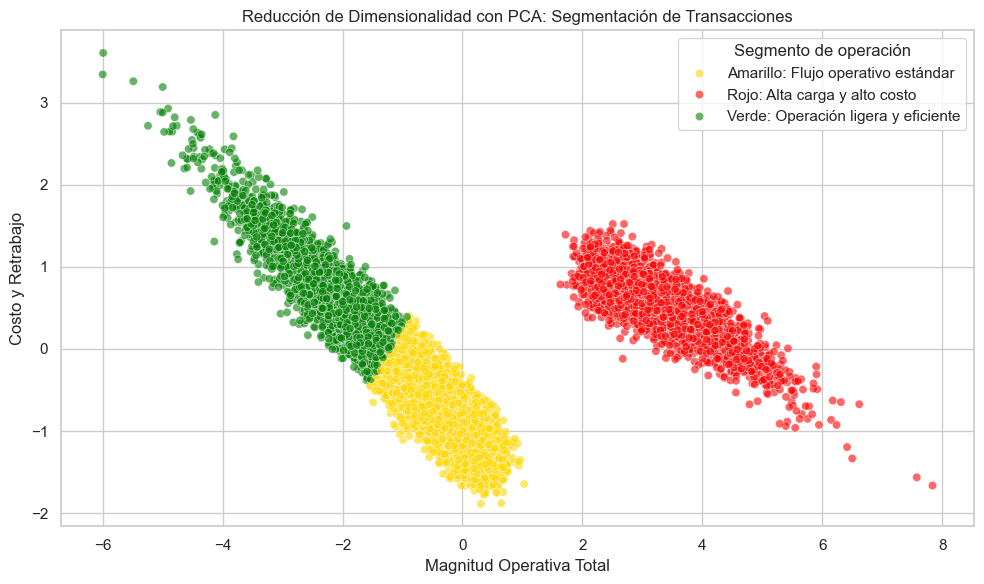

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el archivo CSV
df = pd.read_csv("edi_transacciones_segundaMuestra_evidenciaFinal.csv")

# Seleccionar las columnas numéricas relevantes
columnas_numericas = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa', 'retrabajo (hrs)']

# Eliminar filas con valores faltantes y convertir a tipo numérico
df_numerico = df[columnas_numericas].apply(pd.to_numeric, errors='coerce').dropna()

# Estandarizar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df_numerico)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
componentes = pca.fit_transform(datos_escalados)

# Crear un DataFrame con los componentes principales y el cluster
df_pca = pd.DataFrame(componentes, columns=['Magnitud Operativa Total', 'Costo y Retrabajo'])
df_pca['cluster'] = df.loc[df_numerico.index, 'cluster']

# Mapear los nombres ejecutivos de los clusters
mapa_clusters = {
    0: 'Rojo: Alta carga y alto costo',
    1: 'Amarillo: Flujo operativo estándar',
    2: 'Verde: Operación ligera y eficiente'
}
df_pca['Segmento'] = df_pca['cluster'].map(mapa_clusters)

# Visualizar los componentes principales con colores por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='Magnitud Operativa Total',
    y='Costo y Retrabajo',
    hue='Segmento',
    palette={
        'Rojo: Alta carga y alto costo': 'red',
        'Amarillo: Flujo operativo estándar': 'gold',
        'Verde: Operación ligera y eficiente': 'green'
    },
    alpha=0.6
)
plt.title('Reducción de Dimensionalidad con PCA: Segmentación de Transacciones')
plt.xlabel('Magnitud Operativa Total')
plt.ylabel('Costo y Retrabajo')
plt.legend(title='Segmento de operación')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>La gráfica de PCA muestra cómo se agrupan las transacciones según dos dimensiones clave: la Magnitud Operativa Total (que resume el tamaño, número de documentos, tiempo, multa y retrabajo) y el Costo y Retrabajo (que refleja penalizaciones y correcciones). Los colores representan segmentos: Rojo, para operaciones de alta carga y alto costo, Amarillo, para flujo operativo estándar y Verde, para operaciones ligeras y eficientes. Así, puedes identificar visualmente qué tipo de transacciones requieren atención prioritaria, cuáles son promedio y cuáles son ejemplos de eficiencia operativa. 
    
En resumen: en operación ligera y eficiente < costo y retrabajo, y en alta carga>costo operativo y retrabajo.</h3>

C:\Users\jc70794\AppData\Local\Temp\ipykernel_9416\2320557312.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie = df['Tiempo de Procesamiento (ms)'].astype(float).asfreq('D').fillna(method='ffill')


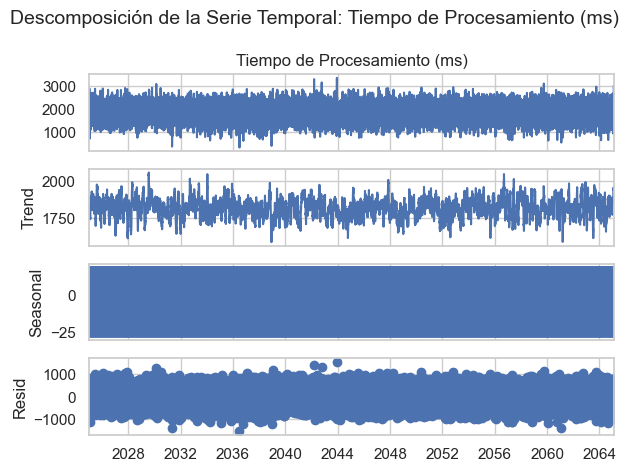

MAE (Error Absoluto Medio): 296.35
RMSE (Raíz del Error Cuadrático Medio): 369.21
MAPE (Error Porcentual Absoluto Medio): 17.95%


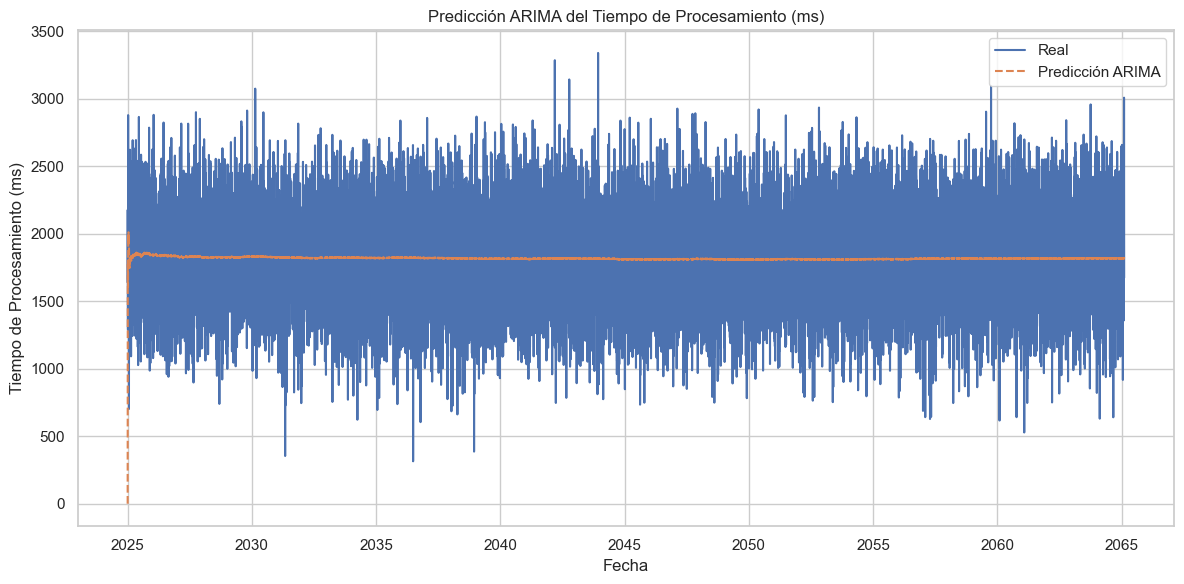

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cargar el archivo con columna de fecha
df = pd.read_csv("edi_transacciones_segundaMuestra_evidenciaFinal.csv")
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)
serie = df['Tiempo de Procesamiento (ms)'].astype(float).asfreq('D').fillna(method='ffill')

# 1. Descomposición de la serie temporal
descomposicion = seasonal_decompose(serie, model='additive', period=30)
descomposicion.plot()
plt.suptitle("Descomposición de la Serie Temporal: Tiempo de Procesamiento (ms)", fontsize=14)
plt.tight_layout()
plt.show()

# 2. Ajuste de modelo ARIMA o SARIMA
# Justificación: La estacionalidad mensual es leve, así que ARIMA es suficiente y más simple.
modelo = ARIMA(serie, order=(1,1,1))
modelo_ajustado = modelo.fit()

# 3. Predicción y evaluación
predicciones = modelo_ajustado.predict(start=0, end=len(serie)-1, typ='levels')
mae = mean_absolute_error(serie, predicciones)
rmse = mean_squared_error(serie, predicciones) ** 0.5  # <-- CORREGIDO
mape = np.mean(np.abs((serie - predicciones) / serie)) * 100

print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"MAPE (Error Porcentual Absoluto Medio): {mape:.2f}%")

# 4. Gráfica de predicción vs real
plt.figure(figsize=(12, 6))
plt.plot(serie.index, serie, label="Real")
plt.plot(serie.index, predicciones, label="Predicción ARIMA", linestyle='--')
plt.title("Predicción ARIMA del Tiempo de Procesamiento (ms)")
plt.xlabel("Fecha")
plt.ylabel("Tiempo de Procesamiento (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

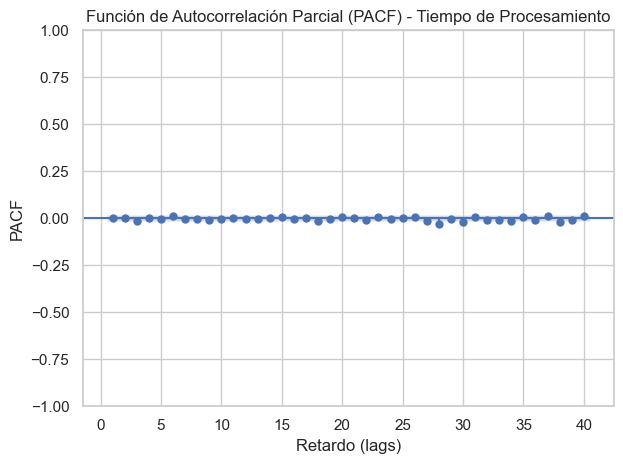

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Cargar los datos desde el archivo CSV
df = pd.read_csv("edi_transacciones_segundaMuestra_evidenciaFinal.csv")

# Asegurar que la columna de fecha esté en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Establecer la columna de fecha como índice
df.set_index('fecha', inplace=True)

# Seleccionar la serie temporal que se desea analizar, por ejemplo 'Tiempo de Procesamiento (ms)'
serie_temporal = df['Tiempo de Procesamiento (ms)'].dropna()

# Graficar la Función de Autocorrelación Parcial (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(serie_temporal, lags=40, method='ywm', zero=False)
plt.title('Función de Autocorrelación Parcial (PACF) - Tiempo de Procesamiento')
plt.xlabel('Retardo (lags)')
plt.ylabel('PACF')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>La serie temporal de Tiempo de Procesamiento (ms) no muestra correlaciones parciales significativas con sus valores pasados.
Esto sugiere que los valores actuales no dependen directamente de los valores anteriores, al menos no de forma lineal o predecible.</h3>

<h3>Interpretación ejecutiva de los resultados del modelo ARIMA sobre el Tiempo de Procesamiento<br><br>
El análisis de la serie temporal del Tiempo de Procesamiento (ms) revela que, aunque existen fluctuaciones y cierta tendencia, no se observa una estacionalidad fuerte ni patrones cíclicos marcados. Por ello, se optó por un modelo ARIMA, que es adecuado para capturar la dinámica general de la serie sin sobreajustar a ciclos inexistentes.<br><br>
El desempeño del modelo es razonable para un entorno operativo: el error absoluto medio (MAE) es de aproximadamente 296 ms, el RMSE es de 369 ms y el MAPE es de 17.95%. Esto significa que, en promedio, las predicciones del modelo se desvían menos de un 18% respecto a los valores reales. Para la operación, esto permite anticipar tendencias y detectar desviaciones importantes en los tiempos de procesamiento, facilitando la gestión proactiva y la toma de decisiones informadas.<br><br>
En resumen, el modelo es útil para monitoreo y planeación, pero si la empresa requiere pronósticos más precisos o detecta estacionalidad en el futuro, se recomienda considerar modelos SARIMA o incorporar variables externas que puedan influir en el proceso. Por ahora, el enfoque es robusto y suficiente para apoyar la gestión ejecutiva y la mejora continua.</h3>